<a href="https://colab.research.google.com/github/Gheras13/Homework/blob/main/Homework_1_3r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MACHINE LEARNING HOMEWORK 1

#DIRECT KINEMATICS OF ROBOT MANIPLUATOR

In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
import tensorflow as tf
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Generate Data

In [ ]:


# Percorso del file CSV
file_path='/content/drive/My Drive/File_csv/Copia di r3_20_100k.csv'
# Carico il dataset
dataset=pd.read_csv(file_path, sep=';', header=0)

# Rimuovo eventuali spazi dai nomi delle colonne
dataset.columns = dataset.columns.str.strip()
#prendo i primi 30000 samples
df=dataset.iloc[:30000]

# Estrazione feature (j0, j1) e i target (ee_x, ee_y)
X = df[['j0', 'j1','j2']].values  # Angoli articolari
Y = df[['ee_x', 'ee_y']].values  # Posizioni finali (end-effector)

Colonne disponibili nel dataset: ['j0', 'j1', 'j2', 'cos(j0)', 'cos(j1)', 'cos(j2)', 'sin(j0)', 'sin(j1)', 'sin(j2)', 'ee_x', 'ee_y', 'ee_qw', 'ee_qz']
Esempio di X (features): [[-0.044 -0.008 -0.076]
 [-0.061 -0.011 -0.106]
 [-0.094 -0.024 -0.199]
 [-0.156 -0.006 -0.309]
 [-0.252  0.062 -0.42 ]]
Esempio di Y (target): [[ 0.309 -0.024]
 [ 0.308 -0.033]
 [ 0.303 -0.055]
 [ 0.296 -0.081]
 [ 0.285 -0.107]]


In [ ]:
# Divisione i dati in training e testing
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

# Test del modello

In [ ]:
# Modello SVR per ee_x
grid_search_x =GridSearchCV(

    estimator=SVR(),
    param_grid={
        'C': [0.1, 1],
        'kernel':['linear','rbf'],
        'epsilon':[0.02, 0.2]
    },

    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Modello SVR per ee_y
grid_search_y=GridSearchCV(
    estimator=SVR(),
    param_grid={
        'C':[0.1, 1],
        'kernel': ['linear','rbf'],
        'epsilon': [0.02,0.2]
    },

    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)

#Grid Search per ee_x

grid_search_x.fit(X_train, Y_train[:,0])
best_model_x=grid_search_x.best_estimator_
best_params_x= grid_search_x.best_params_
best_score_x =-grid_search_x.best_score
print(f"Migliori parametri per ee_x: {best_params_x}")
print(f"Miglior MSE (cross-validation) per ee_x: {best_score_x}")

#Grid Search per ee_y

grid_search_y.fit(X_train, Y_train[:, 1])
best_model_y=grid_search_y.best_estimator_
best_params_y=grid_search_y.best_params
best_score_y=-grid_search_y.best_score_
print(f"Migliori parametri per ee_y: {best_params_y}")
print(f"Miglior MSE (cross-validation) per ee_y: {best_score_y}")

# Miglior modello
Y_pred_x =best_model_x.predict(X_test)
Y_pred_y= best_model_y.predict(X_test)
Y_pred =np.column_stack((Y_pred_x,Y_pred_y))

# Confronto tra coordinate reali e predette
print("\nConfronto tra coordinate reali e predette (prime 10 righe):")

print("{:<10} {:<10} {:<10} {:<10}".format("ee_x (reale)", "ee_x (pred.)", "ee_y (reale)", "ee_y (pred.)"))




for i in range(10):  # Mostra le prime 10 righe
    print("{:<10.4f} {:<10.4f} {:<10.4f} {:<10.4f}".format(
        Y_test[i, 0], Y_pred[i, 0], Y_test[i, 1], Y_pred[i, 1]
    ))

# Calcolo delle metriche sul test set
mse_x =mean_squared_error(Y_test[:, 0], Y_pred_x)
mse_y =mean_squared_error(Y_test[:, 1], Y_pred_y)

mse_total= mean_squared_error(Y_test, Y_pred)
r2_x= r2_score(Y_test[:,0], Y_pred_x)
r2_y= r2_score(Y_test[:,1],Y_pred_y)
r2_total =r2_score(Y_test,Y_pred)
print(f"MSE sul test set (ee_x): {mse_x}")
print(f"MSE sul test set (ee_y): {mse_y}")
print(f"MSE totale sul test set: {mse_total}")
print(f"R2 sul test set (ee_x): {r2_x}")
print(f"R2 sul test set (ee_y): {r2_y}")
print(f"R2 totale sul test set: {r2_total}")




Fitting 3 folds for each of 8 candidates, totalling 24 fits
Migliori parametri per ee_x: {'C': 1, 'epsilon': 0.02, 'kernel': 'rbf'}
Miglior MSE (cross-validation) per ee_x: 0.00016277488089108528
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Migliori parametri per ee_y: {'C': 1, 'epsilon': 0.02, 'kernel': 'rbf'}
Miglior MSE (cross-validation) per ee_y: 0.00015408521989182967

Confronto tra coordinate reali e predette (prime 10 righe):
ee_x (reale) ee_x (pred.) ee_y (reale) ee_y (pred.)
-0.2030    -0.1979    -0.1320    -0.1174   
-0.1490    -0.1452    -0.2300    -0.2115   
0.1960     0.1861     -0.1020    -0.0865   
-0.0640    -0.0795    -0.1630    -0.1607   
0.1050     0.1016     0.0680     0.0841    
-0.2070    -0.1872    -0.1770    -0.1765   
-0.2030    -0.1919    0.0980     0.1118    
-0.1280    -0.1267    0.2470     0.2281    
-0.0680    -0.0639    0.0960     0.1109    
-0.2640    -0.2457    -0.1610    -0.1564   
MSE sul test set (ee_x): 0.00015556047245780124
MSE sul

#Convergenza della perdita durante l'addestramento

 Configurazione del modello per l'addestramento:

 - Funzione di perdita: Mean Squared Error (MSE).
 - Metriche: Mean Absolute Error (MAE).


# Valutazione finale del modello sul set di test.
# Metriche:
# - `loss`: Errore quadratico medio (MSE), risulterà essere la nostra LOSS FUNCTION.
# - `mae`: Errore assoluto medio.



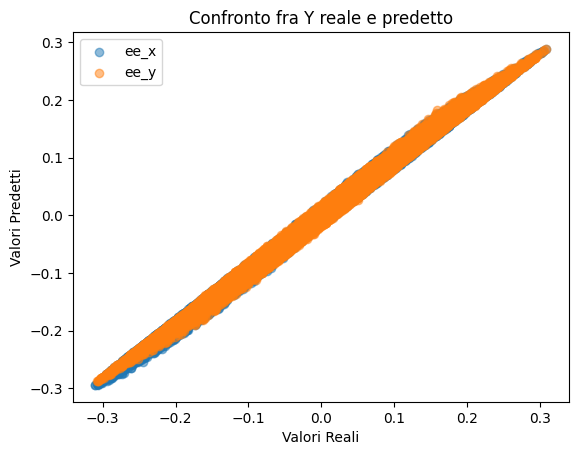

In [ ]:
# Visualizzazione dei risultati
plt.scatter(Y_test[:,0], Y_pred[:,0],label='ee_x', alpha=0.5)
plt.scatter(Y_test[:, 1],Y_pred[:, 1], label='ee_y',alpha=0.5)
plt.legend()
plt.xlabel('Valori Reali')
plt.ylabel('Valori Predetti')
plt.title('Confronto fra Y reale e predetto')
plt.show()


#GRAFICO DI OVERFITTING

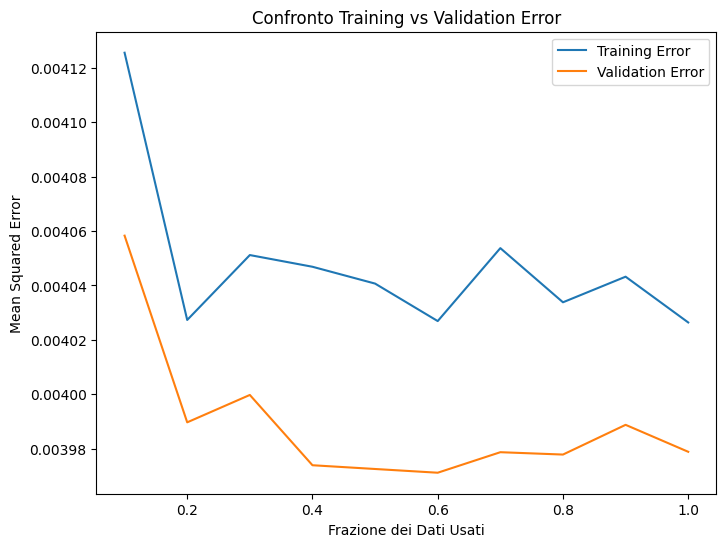

In [ ]:
# Lista per registrare gli errori
training_errors = []
validation_errors = []

# Simulo l'addestramento con più frazioni di dati
fractions = np.linspace(0.1, 1.0, 10)
for frac in fractions:
    # Prendo una porzione del training set
    subset_size = int(frac * len(X_train))
    X_train_subset = X_train[:subset_size]
    Y_train_subset = Y_train[:subset_size]

    # Addestro il modello su sottoinsieme
    model = SVR(kernel='rbf', C=1, epsilon=0.1)
    model.fit(X_train_subset, Y_train_subset[:,0])

    # Calcolo gli errori
    train_pred = model.predict(X_train_subset)

    val_pred = model.predict(X_test)

    training_errors.append(mean_squared_error(Y_train_subset[:, 0], train_pred))

    validation_errors.append(mean_squared_error(Y_test[:,0],val_pred))

# Grafico errori
plt.figure(figsize=(8,6))

plt.plot(fractions, training_errors, label='Training Error')

plt.plot(fractions, validation_errors, label='Validation Error')

plt.title('Confronto Training vs Validation Error')
plt.xlabel('Frazione dei Dati Usati')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

# Confronto delle predizioni(scatter plot)

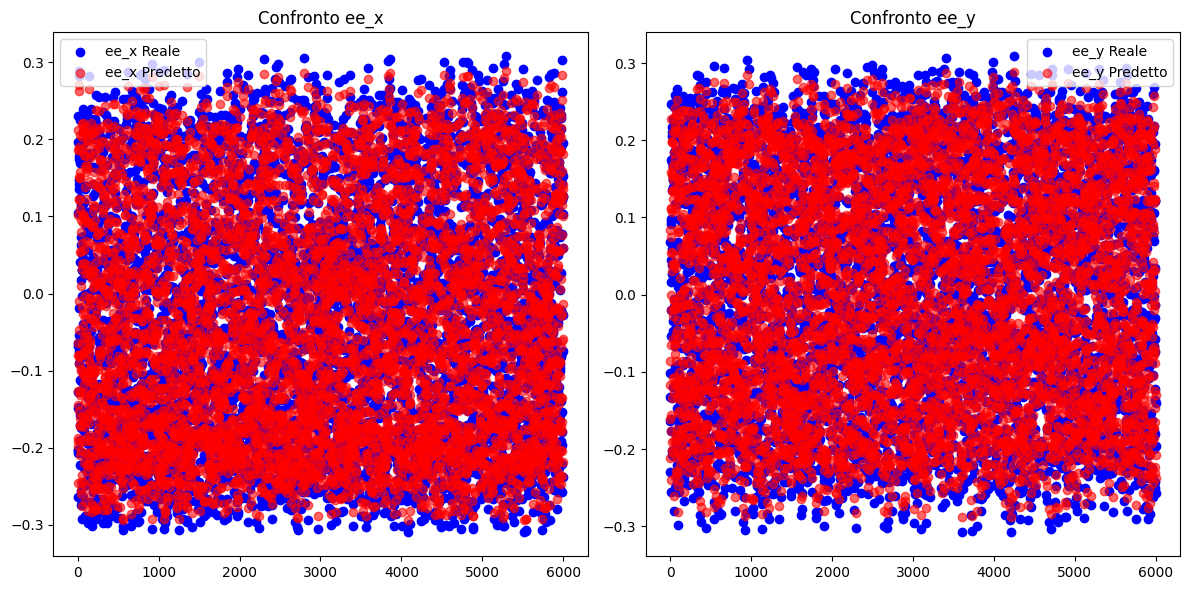

In [ ]:
plt.figure(figsize=(12,6))

# ee_x
plt.subplot(1,2,1)
plt.scatter(range(len(Y_test[:,0])),Y_test[:, 0], color='blue',label='ee_x Reale')
plt.scatter(range(len(Y_pred[:,0])), Y_pred[:,0],color='red', alpha=0.6,label='ee_x Predetto')
plt.title("Confronto ee_x")
plt.legend()

# ee_y


plt.subplot(1,2,2)
plt.scatter(range(len(Y_test[:,1])), Y_test[:, 1],color='blue', label='ee_y Reale')
plt.scatter(range(len(Y_pred[:, 1])), Y_pred[:, 1], color='red',alpha=0.6,label='ee_y Predetto')
plt.title("Confronto ee_y")
plt.legend()

plt.tight_layout()
plt.show()


# Distribuzione degli errori

#Performance del modello per campione

#Definizione dei jacobiani

In [ ]:
def FK_Jacobian_SVR(model_x,model_y,theta, delta=1e-5):




    theta =np.array(theta)
    n_params= len(theta)
    J =np.zeros((2, n_params))  # Jacobiana 2x3  3R

    for i in range(n_params):




        theta_plus=theta.copy()
        theta_plus[i]+=delta

        theta_minus =theta.copy()
        theta_minus[i]-=delta

        # Calcolo della derivata per ee_x
        ee_x_plus= model_x.predict([theta_plus])[0]
        ee_x_minus =model_x.predict([theta_minus])[0]
        J[0, i] = (ee_x_plus - ee_x_minus) / (2 * delta)





        # Calcolo della derivata  per ee_y
        ee_y_plus =model_y.predict([theta_plus])[0]
        ee_y_minus =model_y.predict([theta_minus])[0]
        J[1, i] =(ee_y_plus - ee_y_minus) / (2 * delta)



    return J

# Calcolo della Jacobiana analitica




def analytical_J_3R(theta, L1=0.1, L2=0.1, L3=0.1):
    theta1, theta2,theta3 =theta
    J=np.array([


        [
            -L1 * np.sin(theta1) - L2 * np.sin(theta1 + theta2) - L3 * np.sin(theta1 + theta2 + theta3),
            -L2 * np.sin(theta1 + theta2) - L3 * np.sin(theta1 + theta2 + theta3),
            -L3 * np.sin(theta1 + theta2 + theta3)
        ],
        [
            L1 * np.cos(theta1) + L2 * np.cos(theta1 + theta2) + L3 * np.cos(theta1 + theta2 + theta3),
            L2 * np.cos(theta1 + theta2) + L3 * np.cos(theta1 + theta2 + theta3),
            L3 * np.cos(theta1 + theta2 + theta3)
        ]


    ])
    return J





# Seleziona un esempio dal test set
theta_sample=X_test[0]  # Angoli articolari del robot (j0, j1, j2)


# Calcolo della Jacobiana numerica appresa usando SVR
jacobian_learned =FK_Jacobian_SVR(best_model_x,best_model_y,theta_sample)



# Calcolo della Jacobiana analitica
jacobian_analytical= analytical_J_3R(theta_sample)





# Calcolo dell'errore tra Jacobiane
jacobian_error=np.mean((jacobian_learned-jacobian_analytical) ** 2)





# Stampa i risultati
print("Jacobiana appresa (numerica):\n", jacobian_learned)
print("\nJacobiana analitica:\n", jacobian_analytical)
print(f"\nErrore quadratico medio (MSE) tra Jacobiane: {jacobian_error:.6f}")


Jacobiana appresa (numerica):
 [[ 0.11325764  0.0709425   0.08793357]
 [-0.19045972 -0.10526513 -0.01574719]]

Jacobiana analitica:
 [[ 0.12164191  0.0786329   0.09912738]
 [-0.20133784 -0.11105924 -0.01318189]]

Errore quadratico medio (MSE) tra Jacobiane: 0.000069
